# A fast introduction to Machine Learning



## Introduction to Machine Learning

> Machine learning is the field of study that gives computers the ability
to learn without being explicitly programmed. Arthur Samuel, 1959

Learning:
> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E. Tom Mitchell’s, 1997

Machine learning is a branch of artificial intelligence that allows computers to learn from given information and perform new but similar tasks. 

<img src="./figs/ML-googletrends.png" alt="ML trends" width=80% align="center" >


**Artificial intelligence**: The computer performs actions defined as requiring intelligence -> Moving target
- Search Based Heuristic Optimization
- Evolutionary computation
- Logic Programming (inductive logic programming, fuzzy logic)
- robabilistic Reasoning Under Uncertainty (bayesian networks)
- Computer Vision
- Natural Language Processing
- Robotics
- Machine Learning

Examples:
- Self-driving cars
- ChatGPT (LLM)
- Healthcare: Diagnosis from scans
- Finance: Fraud detection
- Retail: Recommender systems
- Transport: Autonomous vehicles
- Creativity: AI art, music, writing


<!-- <div style="text-align: center;">
    <img src="figs/AI-ML.png" alt="Machine learning as a subarea of artificail intelligence. From: Understanding Deep Learning, Simon J.D. Prince" width="600">
    <figcaption>From: Understanding Deep Learning, Simon J.D. Prince</figcaption>
</div> -->






## Historical development
- https://letsdatascience.com/learn/history/history-of-machine-learning/
- https://github.com/microsoft/ML-For-Beginners/blob/main/1-Introduction/2-history-of-ML/README.md
- https://www.inveniam.fr/a-brief-history-of-machine-learning
- https://ahistoryofai.com/

Hardware was too costly, but improvements on both cpu and gpu made it practical, or at least attainable, to apply the different AI models.

<img src="figs/transistors-per-microprocessor.png" alt="transistor versus microprocesos" width="60%" align="center">


<img src="https://epochai.org/assets/images/posts/2022/gpu-perf/gpu-perf-banner.png" alt="gpu-perf over time" style="width: 80%;"/>

## Types of learning
<img src="./figs/AI-ML.png" alt="ML trends" width=40% align="center" >

## Practical, short, fast example

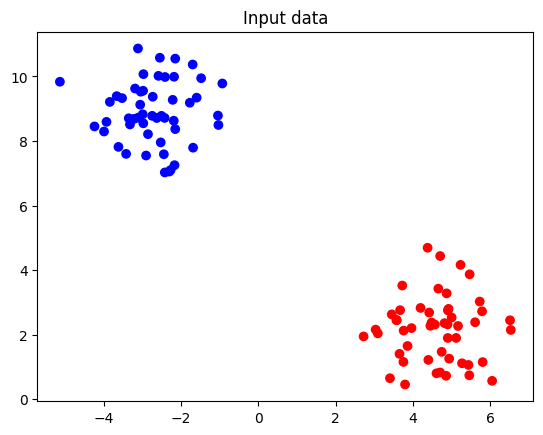

In [46]:
# Data creation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Input data")
plt.show()

### Supervised
- Learn from labeled examples
- Task: Prediction (classification or regression)

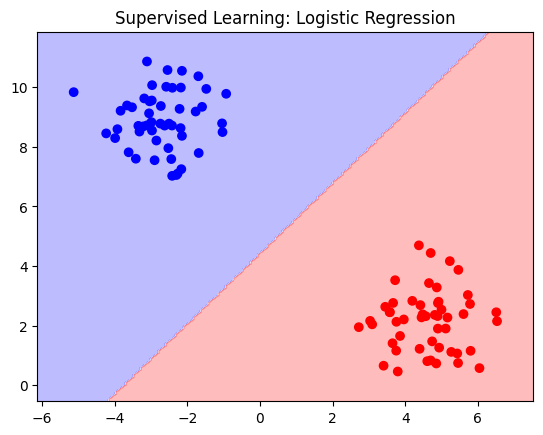

In [47]:
# Classification
from sklearn.linear_model import LogisticRegression
import numpy as np

# Train a classifier
model = LogisticRegression()
model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Supervised Learning: Logistic Regression")
plt.show()

### Unsupervised 
- No labels, find structure in data
- Task: Clustering or dimensionality reduction

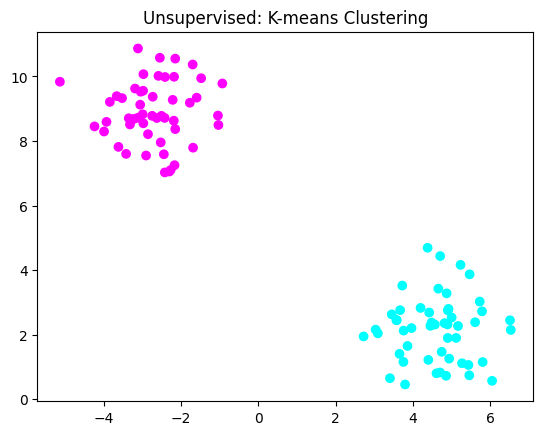

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
preds = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=preds, cmap='cool')
plt.title("Unsupervised: K-means Clustering")
plt.show()

### Reinforcement learning
- Learn by trial and error
- Agent interacts with environment


In [33]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/L_4BPjLBF4E?si=4vNIAkUAz7tkTyiO", width="560", height="315")

## Typical workflow
<img src="./figs/ML-workflow.png" alt="ML workflow" width="50%" align="center">


1. **Dataset Collection**: Depends on the experiment or goals. What kind of data ? (categorical numerical) How much data? Units? reference data? data base? Data storage/access? 
2. **Dataset preprocessing**: Cleaning data. Missing data. Noise. Outliers. Normalization. Training and test sets. Or Train, validation (for hyper parameters), and test set. 
3. **Model training**: Depends on the actual approach. For supervised learning we need both input and output values. For unsupervised only input. No underfitting or overfitting. 
4. **Model evaluation**: Testing the training success, with some defined metrics. Maybe needs to redo some previous steps.

### Core concepts
- **Data**: examples used for learning
- **Features**: inputs (e.g., age, temperature, pixels)
- **Model**: function that maps input to output
- **Training**: adjusting model to reduce error
- **Testing**: evaluate model on new data
- **Meta-Parameters**: Parameters controlling the model

Beware of under/over fitting : See also last part of <https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks>

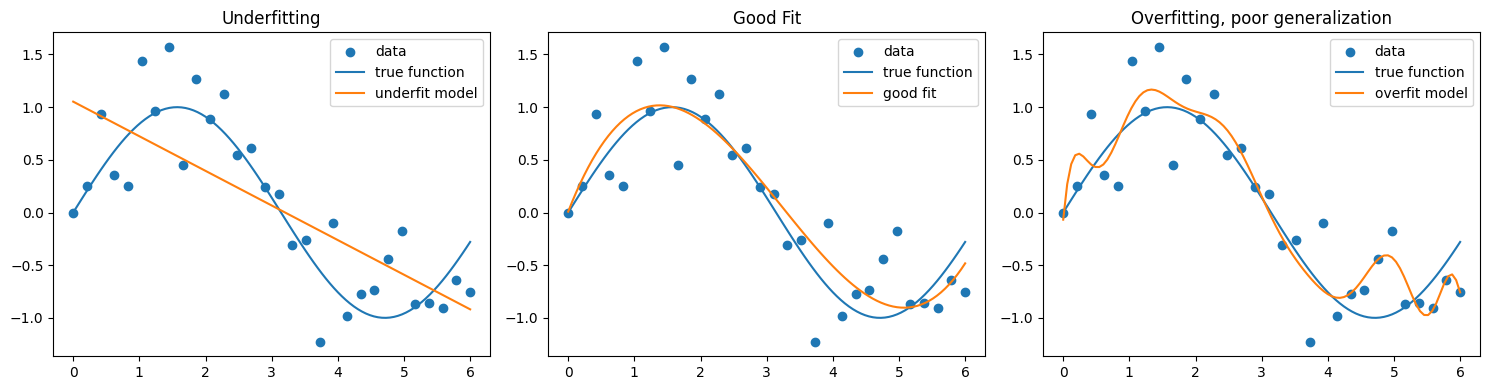

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = np.linspace(0, 6, 30)
y = np.sin(x) + 0.3 * np.random.randn(30)
X = x[:, np.newaxis]

# True function
x_plot = np.linspace(0, 6, 100).reshape(-1, 1)

plt.figure(figsize=(15, 4))

# Underfitting (degree=1)
plt.subplot(1, 3, 1)
model_under = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_under.fit(X, y)
plt.scatter(x, y, label='data')
plt.plot(x_plot, np.sin(x_plot), label='true function')
plt.plot(x_plot, model_under.predict(x_plot), label='underfit model')
plt.title("Underfitting")
plt.legend()

# Good fit (degree=3)
plt.subplot(1, 3, 2)
model_good = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_good.fit(X, y)
plt.scatter(x, y, label='data')
plt.plot(x_plot, np.sin(x_plot), label='true function')
plt.plot(x_plot, model_good.predict(x_plot), label='good fit')
plt.title("Good Fit")
plt.legend()

# Overfitting (degree=15)
plt.subplot(1, 3, 3)
model_over = make_pipeline(PolynomialFeatures(15), LinearRegression())
model_over.fit(X, y)
plt.scatter(x, y, label='data')
plt.plot(x_plot, np.sin(x_plot), label='true function')
plt.plot(x_plot, model_over.predict(x_plot), label='overfit model')
plt.title("Overfitting, poor generalization")
plt.legend()

plt.tight_layout()
plt.show()

## ML Algorithms
- https://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet
- https://sites.google.com/view/datascience-cheat-sheets
- https://github.com/SamBelkacem/AI-ML-cheatsheets
- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

<img src="./figs/ML-CheatSheet-01.webp" alt="Some algs ML" class="centerimg50">
<img src="figs/ML-Cheat-Sheet_2.png" alt="ML Cheat sheet: https://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet" width="80%" align="center">


### Classifier comparison:
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png" alt="Classifiers" class="centerimg30">

### Tensor flow playground
Try: <https://playground.tensorflow.org>


## Applications to Scientific Discovery

"AI is becoming a microscope for data: it helps scientists see patterns and predictions that were previously invisible."


Machine Learning and AI are accelerating breakthroughs in scientific research by helping scientists extract patterns from massive datasets, automate complex processes, and even generate new hypotheses.

| Field             | ML/AI Application                                                                   |
| ----------------- | ----------------------------------------------------------------------------------- |
| Astronomy         | Classifying galaxies from telescope data; finding exoplanets (e.g., Kepler mission) |
| Physics           | Simulating particle collisions (e.g., CERN), anomaly detection in LHC data          |
| Biology           | Protein folding prediction (e.g., AlphaFold), gene expression analysis              |
| Chemistry         | Drug discovery by molecular property prediction                                     |
| Climate Science   | Modeling weather and climate patterns; detecting extreme events                     |
| Materials Science | Discovering new materials using generative models and property prediction           |
| Neuroscience      | Brain activity decoding from EEG/fMRI signals                                       |

**AlphaFold** by DeepMind predicts the 3D structure of proteins from amino acid sequences with remarkable accuracy — solving a 50-year grand challenge in biology.
- <https://deepmind.google/science/alphafold/>
- https://www.youtube.com/watch?v=gg7WjuFs8F4


**Google Co-Scientist**
- <https://blog.google/feed/google-research-ai-co-scientist/>
- <https://research.google/blog/accelerating-scientific-breakthroughs-with-an-ai-co-scientist/>


## ML Ethics
- http://approximatelycorrect.com/2016/11/07/the-foundations-of-algorithmic-bias/
- https://www.edx.org/course/data-science-ethics-michiganx-ds101x-1 
- https://en.wikipedia.org/wiki/Weapons_of_Math_Destruction?useskin=vector

- Bias in algorithms (data reflects societal bias).
- Transparency (black-box models).
- Automation and the future of work.
- AI alignment and safety.
- Power usage:
  <img src="https://www.researchgate.net/profile/Yuzhuo-Li-2/publication/384115745/figure/fig5/AS:11431281278937909@1726775834031/Reported-energy-consumption-of-training-different-LLM-models-with-respect-to-model.png" alt="https://www.researchgate.net/publication/384115745_The_Unseen_AI_Disruptions_for_Power_Grids_LLM-Induced_Transients" width="40%" align="center">
  + https://www.nature.com/articles/s41598-024-76682-6
  + https://birchtree.me/blog/another-study-on-llm-energy-use/
    

## AI in scientific discovery: examples
Machine Learning is transforming how scientists explore and understand the world by revealing patterns, accelerating simulations, and automating classification.
### 🔭 Example 1: Detecting Supernovae
Classifying celestial events using features like brightness and spectral line strength.

DATA: https://www.kaggle.com/competitions/PLAsTiCC-2018/data

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Prepare data
X = supernova_data[['brightness', 'spectral_line_strength', 'redshift']]
y = supernova_data['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Supernova Detection (Random Forest)")
plt.show()


NameError: name 'supernova_data' is not defined

### 🧬 Example 2: Classifying Protein Types
Distinguishing enzymes from non-enzymes using biochemical features.

DATA: https://archive.ics.uci.edu/datasets

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Prepare data
X = protein_data[['hydrophobicity', 'charge', 'molecular_weight']]
y = LabelEncoder().fit_transform(protein_data['label'])  # enzyme=1, non-enzyme=0

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Protein Classification (Logistic Regression)")
plt.show()


NameError: name 'protein_data' is not defined

### ⚗️ Example 3: Predicting Molecular Boiling Point
Using regression to estimate a physical property from structural features.

DATA: https://moleculenet.org/

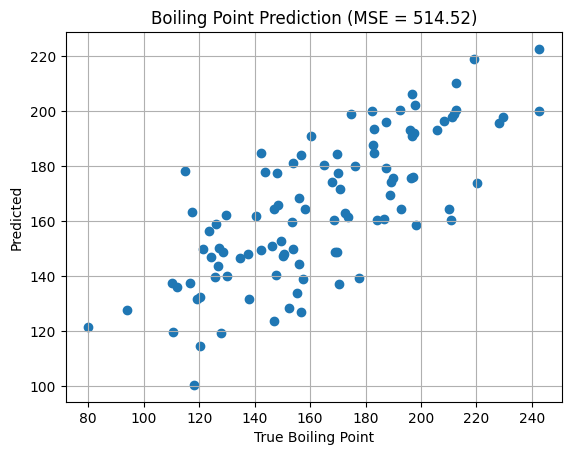

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Prepare data
X = molecular_data[['num_atoms', 'molecular_weight', 'polarity']]
y = molecular_data['boiling_point']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

# Evaluate
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("True Boiling Point")
plt.ylabel("Predicted")
plt.title(f"Boiling Point Prediction (MSE = {mse:.2f})")
plt.grid(True)
plt.show()
